<a href="https://colab.research.google.com/github/petervinhchau/public/blob/main/vit_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p /content/utils/
# Please upload files attention_rollout.py and data_load.py to /content/ultils/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils.data_load import load_CIFAR10

# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Versions of used packages:
# python == 3.10.8
# torch == 2.6.0
# numpy == 1.26.4
# transformers == 4.49.0
# Pillow == 9.4.0
# datasets == 3.3.2

# Section #1.1: Vision Transformer


In [5]:
# ======================================================================================================= #
# It might take some time to downliad the dataset the first time
# ======================================================================================================= #
!pip install datasets
from datasets import load_dataset

ds = load_dataset('benjamin-paine/imagenet-1k-64x64', split='validation')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/88.5k [00:00<?, ?B/s]

train-00000-of-00005.parquet:   0%|          | 0.00/348M [00:00<?, ?B/s]

train-00001-of-00005.parquet:   0%|          | 0.00/355M [00:00<?, ?B/s]

train-00002-of-00005.parquet:   0%|          | 0.00/345M [00:00<?, ?B/s]

train-00003-of-00005.parquet:   0%|          | 0.00/339M [00:00<?, ?B/s]

train-00004-of-00005.parquet:   0%|          | 0.00/349M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/68.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/136M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1281167 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100000 [00:00<?, ? examples/s]

data num = 500


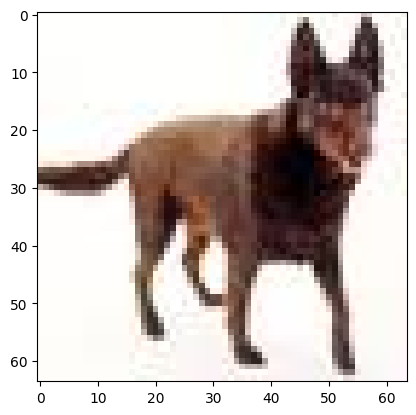

In [6]:
data_num = 500
idx = np.arange(0,50000,int(50000/data_num))
data = ds[idx]
data_num = len(data['image'])
print('data num =', data_num)

plt.imshow(data["image"][250]) #Pillow == 9.4.

In [7]:
# ======================================================================================================= #
# Load the ViT model. See the original paper at: https://arxiv.org/abs/2010.11929
# Documentation of the model can be found at: https://huggingface.co/docs/transformers/model_doc/vit
# ======================================================================================================= #
from transformers import AutoImageProcessor, ViTForImageClassification

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
vit_model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224", attn_implementation='eager')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Complete the following code to evaluate the validation accuracy of the model.

In [8]:
# ==================================================================================== #
# In this block, we evaluate the accuracy on the validation set of the ViT model.
# To predict the label of an image from the validation set, you need to
#   1) Process the image with
#       inputs = image_processor(image, return_tensors="pt")
#   2) Get the classification score (before softmax) with
#       model(**inputs).logits
#   3) A pytorch tensor will be returned. Predict the label with the largest score.
#   4) Evaluate the accuracy on the validation set
# ==================================================================================== #

val_acc = 0

for i in range(0, data_num):
    if((i+1) % (data_num/100)==0):
        print(f'Progress: {int((i+1)/data_num*100)}%', end='\r')

    inputs = image_processor(data['image'][i], return_tensors="pt")
    logits = vit_model(**inputs).logits

    # top 1 prediction
    predicted_label = logits.argmax(-1).item()

    if(data['label'][i] == predicted_label):
        val_acc += 1

print()
val_acc /= data_num

print(f"Val acc = {val_acc*100:.2f}%")

#plt.imshow(ds[idx]["image"]) #Pillow == 9.4.0
#plt.show


Val acc = 59.60%


# Section 1.2: Attention maps
Now, let's look at the attention map of the model.

Generating test split: 0 examples [00:00, ? examples/s]

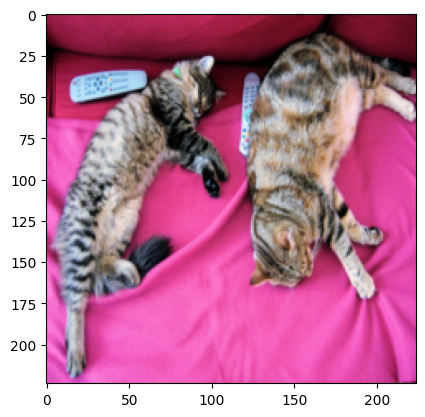

In [10]:
# ==================================================================================== #
# We download a single image with higher resolution from:
#   https://huggingface.co/datasets/huggingface/cats-image
# This should be a image of two cute cats.
# ==================================================================================== #

# Added trust_remote_code=True to load the dataset
cat_img = load_dataset('huggingface/cats-image', trust_remote_code=True)['test']['image'][0]
# cat_img = load_dataset('huggingface/cats-image')['test']['image'][0]


# Feed the image into the model so that we can get the attention maps
inputs = image_processor(images=cat_img, return_tensors="pt")
outputs = vit_model(**inputs, output_attentions=True)
attentions = outputs.attentions

# This should show a processed and cropped image from the original image
plt.imshow(inputs['pixel_values'][0].permute(1, 2, 0)/2+0.5)

## Question:
In this problem, the size of each input image is 224x224 pixels. To tokenize each image into patches with each patch with the size of 16x16 pixels. Particularly in the classification task, an additional CLS token is added to the input (this comes from the technique from BERT). The output of the Transformer corresponding to the CLS token will be fed into an MLP for further classifcation task.

In this setting, what will be the total number of tokens for one image?

## Answer:

(Your answer here)



Attention maps of the first attention layer:


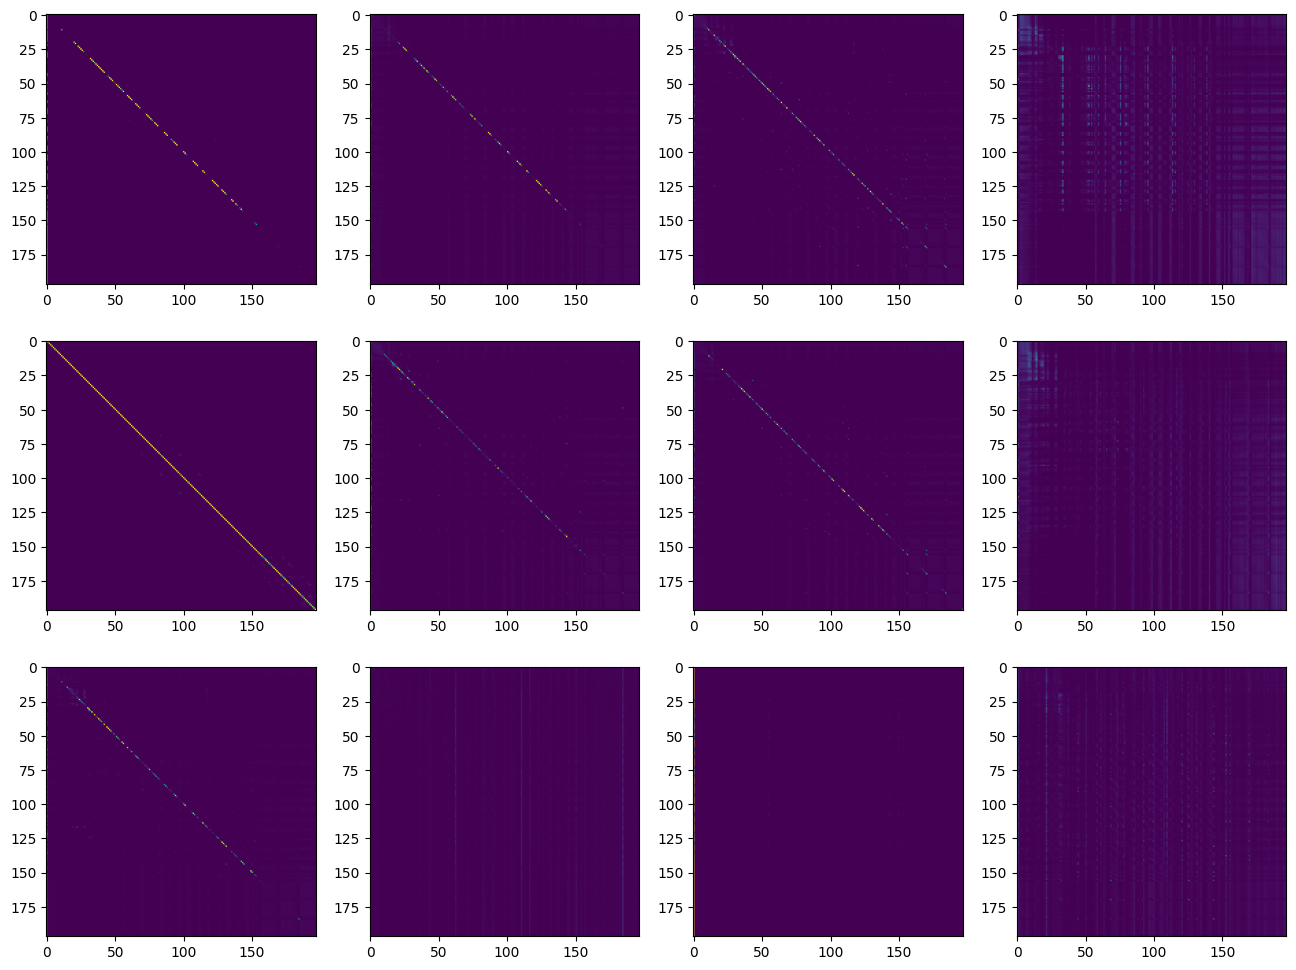

In [11]:
# ==================================================================================== #
# This show the attentions map of the first attention layer.
# ==================================================================================== #

print('Attention maps of the first attention layer:')
ig, axs = plt.subplots(3, 4, figsize=(16, 12))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(attentions[0][0, i, :, :].detach().cpu().numpy())
    #ax.axis('off')

## Questions:
(1) What is the size of one attention map in the figure above? What does each element on the attention map stand for?

(2) There are 12 attention maps in one attention layer. How is this related to the multi-hear attention we learned in class?

## Answer:
(1) (Your answer here)

(2) (Your answer here)

Attention maps of the last attention layer:


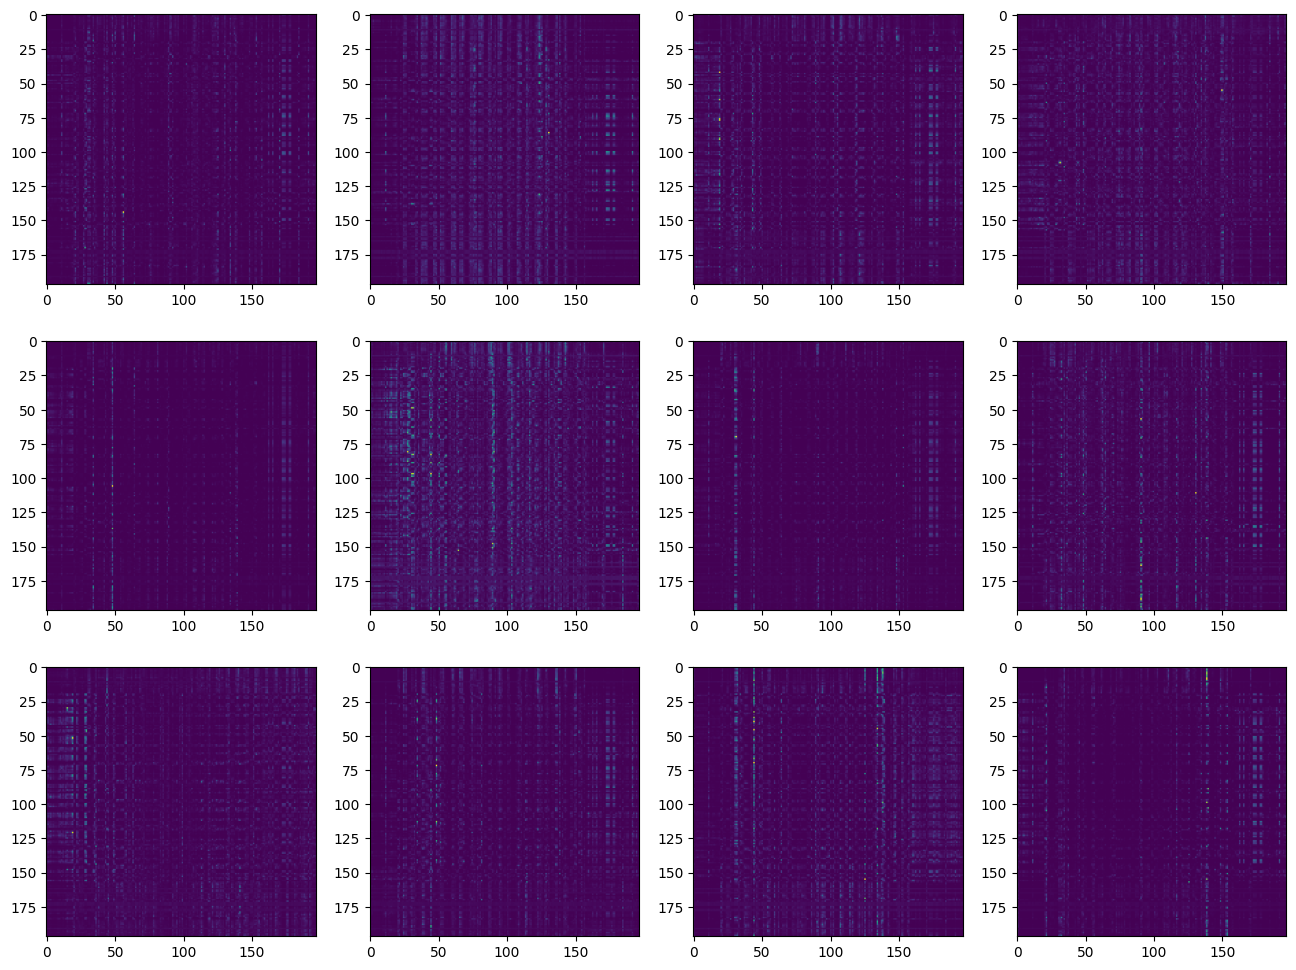

In [12]:
# ==================================================================================== #
# This show the attentions map of the last attention layer.
# ==================================================================================== #

print('Attention maps of the last attention layer:')
ig, axs = plt.subplots(3, 4, figsize=(16, 12))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(attentions[-1][0, i, :, :].detach().cpu().numpy())
    #ax.axis('off')

## Questions:
(1) One advantage of transformers is that they can relate patches (tokens) that are far away from each other. Can we observe this from the attention maps in the last attention layer?

(2) What's the difference between the attention maps in the first attention layer and the last attention layer?

## Answers:
(1) (Your answer here)

(2) (Your answer here)

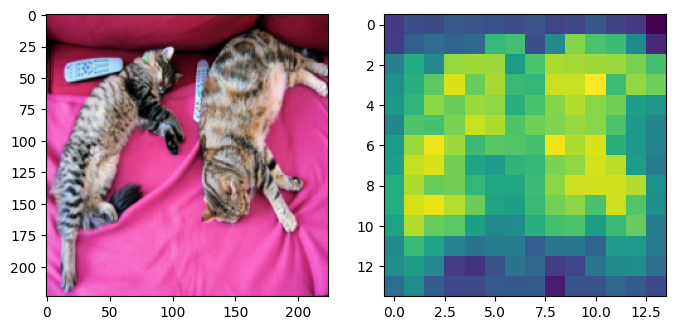

In [13]:
# ==================================================================================== #
# Here is another way to visualize the attention map. This is in the paper: https://arxiv.org/abs/2005.00928
# There are also explanations at: https://medium.com/@nivonl/exploring-visual-attention-in-transformer-models-ab538c06083a
# The so called attention rollout coonsiders the attention effect of all layers.
# We look at the attention values from the CLS token to all the other 14x14 tokens.
# Thus, we can show the attention effect in a 14x14 plot.
# ==================================================================================== #


from utils.attention_rollout import attention_rollout
from PIL import ImageFilter, Image

rollout = attention_rollout(attentions)

num_of_patches = 14*14
img_size = 224

cls_attention = rollout[0, 1:, 0]  # Get attention values from [CLS] token to all patches
cls_attention = 1 - cls_attention.reshape(int(np.sqrt(num_of_patches)), int(np.sqrt(num_of_patches)))

# Normalize the attention map for better visualization
cls_attention = (cls_attention - cls_attention.min()) / (cls_attention.max() - cls_attention.min())

ig, axs = plt.subplots(1, 2, figsize=(8, 8))
axs[0].imshow(inputs['pixel_values'][0].permute(1, 2, 0)/2+0.5)
axs[1].imshow(cls_attention.detach().numpy())

## Question:

The output of the Transformer corresponding to the CLS token is used for further classification taks through an MLP. By looking at the attention map above, what can you say about the results? Which tokens make more influence to the prediction result?

## Answers:

(Your answer here)

# Section 2.1: ResNet-50

In [14]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

# import the ResNet-50 model
rn50_model = ResNet50(weights='imagenet')

# process the data
inputs = []
for img in data['image']:
    inputs.append( tf.image.resize(tf.keras.utils.img_to_array(img), size=[224,224]) )
inputs = tf.convert_to_tensor(inputs)

# predict the labels with resnet50
pred = rn50_model.predict(inputs)

# print the val acc
val_acc = np.mean( pred.argmax(-1) == np.array(data['label']))
print(f"Val acc = {val_acc*100:.2f}%")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step
Val acc = 18.00%


The accuracy is much lower than what we expect from ResNet50 since we are testing on a donwsized dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


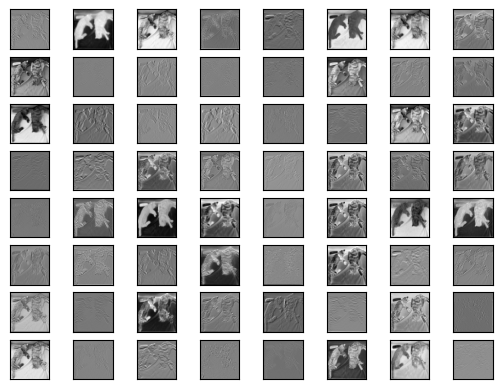

In [15]:
# ==================================================================================== #
# Here, we show the feature maps of ResNet50
# By defult, we are showing the output of the second layer of ResNet-50
# You can play around different layer according to the model structure we show in the next block
# ==================================================================================== #

layer_idx = 2		# plot the output of the desired layer
square = 8			# plot all 64 maps in an 8x8 squares (depends on which layer we are showing)

# set a model with the same begining layers as ResNet-50, end at the desired layer to show its output
fm_model = tf.keras.Model(inputs=rn50_model.inputs, outputs=rn50_model.layers[layer_idx].output)

# get the image
cat_img = load_dataset('huggingface/cats-image')['test']['image'][0]
img = np.expand_dims(tf.image.resize(tf.keras.utils.img_to_array(cat_img), size=[224,224]), axis=0)
img = tf.keras.backend.eval( tf.keras.backend.constant(img) )

# let the image run through the network
feature_maps = fm_model.predict(img)

# show the plos
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

Different subplots correspond to the output of different filters. Each filter might detect different features like edges, textures or specific shapes.

In [16]:


for i in range(len(rn50_model.layers)):
	layer = rn50_model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 conv1_pad (None, 230, 230, 3)
2 conv1_conv (None, 112, 112, 64)
3 conv1_bn (None, 112, 112, 64)
4 conv1_relu (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
8 conv2_block1_1_bn (None, 56, 56, 64)
9 conv2_block1_1_relu (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
11 conv2_block1_2_bn (None, 56, 56, 64)
12 conv2_block1_2_relu (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
15 conv2_block1_0_bn (None, 56, 56, 256)
16 conv2_block1_3_bn (None, 56, 56, 256)
17 conv2_block1_add (None, 56, 56, 256)
18 conv2_block1_out (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
20 conv2_block2_1_bn (None, 56, 56, 64)
21 conv2_block2_1_relu (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
23 conv2_block2_2_bn (None, 56, 56, 64)
24 conv2_block2_2_relu (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
26 conv2_block2_3_bn (None, 56, 56, 256)
27 conv2_block2_add (None, 56, 56, 256)
28 